### Training the yolov8  with custom dataset of tomato leafs

In [18]:
from ultralytics import YOLO

# Load a model
model = YOLO("best.pt") # build a new model from scratch
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model

#For training the model
# model.train(data="data.yaml", epochs=20)
# metrics = model.val()


# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
# path = model.export(format="onnx")  # export the model to ONNX format 

##### Predict for a test image

In [19]:
results = model(r"C:\Users\praph\OneDrive\Desktop\Tomato90.jpg",conf = 0.8) 



image 1/1 C:\Users\praph\OneDrive\Desktop\Tomato90.jpg: 640x640 2 TomatoLeafs, 269.5ms
Speed: 6.2ms preprocess, 269.5ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 640)


#### These are the peredicted bounding boxes of the image 

In [3]:

for result in results:
    # detection
    input_boxes = result.boxes.xyxy 
    print(input_boxes)

    # print(result.boxes.xyxy) # It is a tensor object
    
    

tensor([[ 919.6151, 1633.0077, 1935.0831, 3105.9424],
        [1645.4371,  695.6186, 2960.8386, 1825.7711]])


In [18]:
# from ultralytics.utils.plotting import Annotator
# from PIL import Image
# import cv2
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# img = Image.open("C:/Users/praph/Downloads/TestImage1.jpg")
# for r in results:
#         fig, ax = plt.subplots(figsize=(10, 8))
#         annotator = Annotator(img)
        
#         boxes = r.boxes
#         for box in boxes:
            
#             b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
#             c = box.cls
#             annotator.box_label(b, model.names[int(c)])
# img = annotator.result()
# cv2.waitKey(0)  
# cv2.imwshow('YOLO V8 Detection', img)    
# cv2.destroyAllWindows() 
# # if cv2.waitKey(1) & 0xFF == ord(' '):
# #     break

#### how to plot the multiple bounding boxes

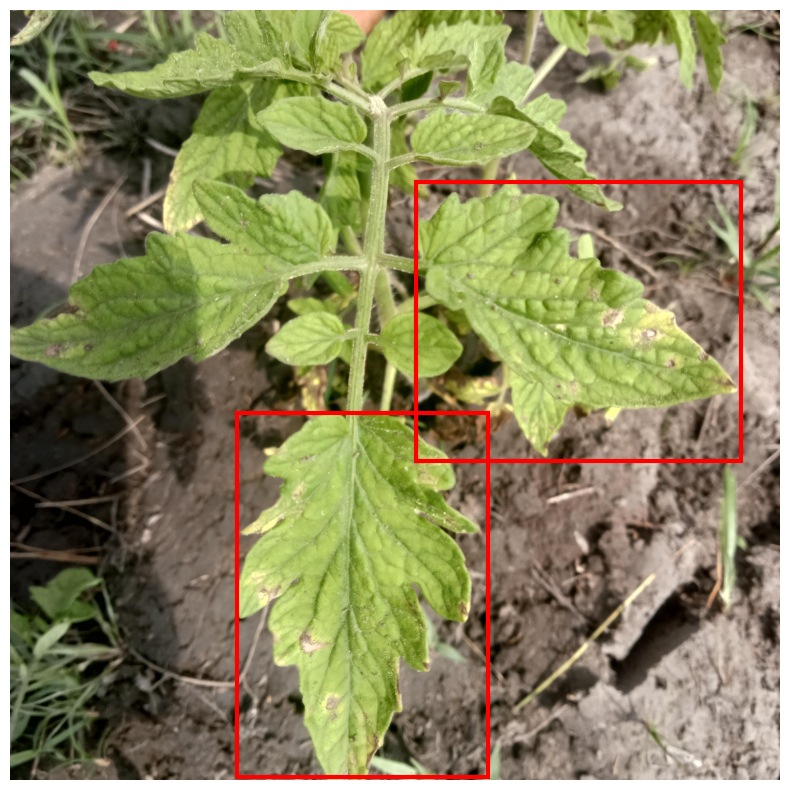

In [16]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from ultralytics.models.sam import Predictor as SAMPredictor
import cv2
%matplotlib inline
im = mpimg.imread(r"C:\Users\praph\OneDrive\Desktop\Tomato90.jpg")
# plt.imshow(im)
# plt.show()
# "C:\Users\praph\Downloads\TestImage1.jpg"

for result in results:
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))

    boxes = result.boxes
    ax.imshow(im)

    for box in boxes:
    # Display the image
        
        # bbox = np.array([[71.8246, 111.9604, 757.2079, 1270.9786]])
        x_min, y_min, x_max, y_max = box.xyxy[0]
        
        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=3, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        
    # ax.set_xlim(x_min - 10, x_max + 10)
    # ax.set_ylim(y_min - 10, y_max + 10)
    # plt.imshow(fig)
plt.axis('off')
plt.savefig('Bbox multiple leaves.jpg',bbox_inches='tight')
plt.show()



In [20]:
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=1024, model="mobile_sam.pt")
predictor = SAMPredictor(overrides=overrides)
for result in results:
    boxes = result.boxes
    ax.imshow(im)
    input_boxes = result.boxes.xyxy
    print(input_boxes)
    
    predictor.set_image(r"C:\Users\praph\OneDrive\Desktop\Tomato90.jpg")
    segment = predictor(bboxes= input_boxes)
    # print(segment)

tensor([[ 919.6151, 1633.0077, 1935.0831, 3105.9424],
        [1645.4371,  695.6186, 2960.8386, 1825.7711]])
Ultralytics YOLOv8.2.12  Python-3.12.3 torch-2.3.0+cpu CPU (AMD Ryzen 5 7535U with Radeon Graphics)

image 1/1 C:\Users\praph\OneDrive\Desktop\Tomato90.jpg: 1024x1024 149.2ms
Speed: 0.0ms preprocess, 149.2ms inference, 64.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to C:\Users\praph\runs\segment\predict


In [21]:
mask_image = segment[0].masks.xy
len(mask_image)

2

In [12]:
import cv2
import numpy as np
import os

# Load the original image
original_image = cv2.imread(r"C:\Users\praph\Downloads\TestImage1.jpg")

# Define the mask coordinates
mask_coordinates = np.array(mask_image[1], dtype=np.int32)  # Your mask coordinates here

# Create a black image with the same dimensions as the original image
black_image = np.zeros_like(original_image)

# Draw the mask on the black image
cv2.fillPoly(black_image, [mask_coordinates], (255, 255, 255))  # Fill mask with white color

# Convert the black image to grayscale
black_image_gray = cv2.cvtColor(black_image, cv2.COLOR_BGR2GRAY)

# Use bitwise operations to keep only the pixels within the mask from the original image
result_image = cv2.bitwise_and(original_image, original_image, mask=black_image_gray)

resized_image = cv2.resize(result_image, (300, 400))
# Display or save the result image
directory = r"C:\ACPS"
os.chdir(directory)

print(os.listdir(directory))
cv2.imwrite("Result Image.jpg", resized_image)
cv2.waitKey(0)

# cv2.destroyAllWindows()


['data', 'data.yaml', 'main.ipynb', 'main.py', 'mobile_sam.pt', 'Result Image1.jpg', 'tempCodeRunnerFile.py', 'yolov8n.pt', 'yolov8s.pt']


-1

In [18]:
import os

# Define the directory path
directory = r"C:\Users\praph\runs\segment"

# Get a list of all directories in the specified directory
directories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Sort the directories by creation time (ascending order)
directories.sort(key=lambda x: os.path.getctime(os.path.join(directory, x)))

# Get the name of the last created directory
last_created_directory = directories[-1]

# Extract the number from the directory name
last_number = int(last_created_directory.replace('predict', ''))

# Increment the number and create the new directory name
new_directory_name = 'predict{}'.format(last_number + 1)

print("Last created directory:", last_created_directory)
print("New directory name:", new_directory_name)


Last created directory: predict51
New directory name: predict52
